<a href="https://colab.research.google.com/github/Jarvis0123/GIS/blob/main/M_Rahmat_Azhari_21170111_UTS_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, geodataframe, read_file

In [ ]:
zipfile = "Kab.Bireun.geojson"
kota = gpd.read_file(zipfile)

In [ ]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,Shape_Leng,Shape_Area,geometry
0,None,PEUSANGAN SELATAN,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,BIREUEN,None,ACEH,None,0,0.756775,0.010201,"MULTIPOLYGON Z (((96.80450 5.18356 0.00000, 96..."
1,None,PEUSANGANSIBLAHKRUENG,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,BIREUEN,None,ACEH,None,0,0.790064,0.008356,"MULTIPOLYGON Z (((96.83603 5.15702 0.00000, 96..."
2,None,JULI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,BIREUEN,None,ACEH,None,0,0.978255,0.021655,"MULTIPOLYGON Z (((96.73734 5.16315 0.00000, 96..."
3,None,PEULIMBANG,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,BIREUEN,None,ACEH,None,0,0.994996,0.010534,"MULTIPOLYGON Z (((96.52418 4.91708 0.00000, 96..."
4,None,PANDRAH,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,...,None,None,BIREUEN,None,ACEH,None,0,0.754593,0.009391,"MULTIPOLYGON Z (((96.48570 5.20495 0.00000, 96..."


<Axes: >

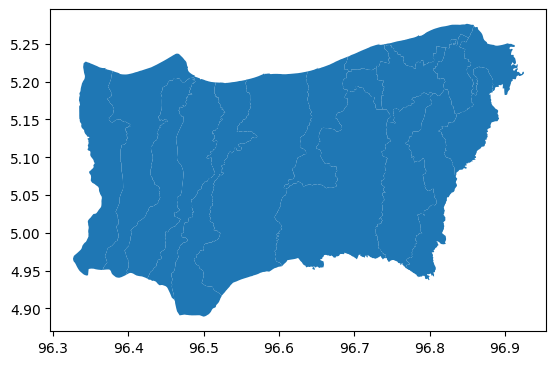

In [ ]:
kota.plot()

<Axes: >

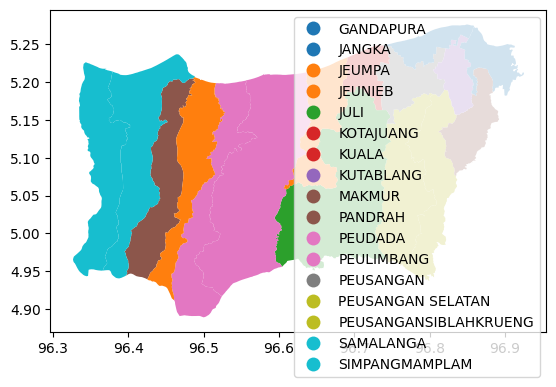

In [ ]:
kota.plot(column='NAMOBJ', legend=True)

In [ ]:
pip install mapclassify

In [ ]:
kota.explore()

In [ ]:
kota.explore(
column="NAMOBJ", # make choropleth based on "BoroName" column
tooltip="NAMOBJ", # show "BoroName" value in tooltip (on hover)
popup=True, # show all values in popup (on click)
tiles="CartoDB positron", # use "CartoDB positron" tiles
cmap="Set2", # use "Set2" matplotlib colormap
style_kwds=dict(color="black"), # use blakc outline
)

In [ ]:
import folium

In [ ]:
m = kota.explore(
column="NAMOBJ", # make choropleth based on "POP2010" column
scheme="naturalbreaks", # use mapclassify's natural breaks scheme
legend=True, # show legend
k=10, # use 10 bins
tooltip=False, # hide tooltip
popup=["NAMOBJ", "NAMOBJ"], # show popup (on-click)
legend_kwds=dict(colorbar=False), # do not use colorbar
name="NAMOBJ", # name of the layer in the map
)

In [ ]:
kota.explore(
m=m, # pass the map object
color="blue", # use red color on all points
marker_kwds=dict(radius=5, fill=True), # make marker radius 10px with fill
tooltip="NAMOBJ", # show "name" column in the tooltip
tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
name="NAMOBJ", # name of the layer in the map
)
folium.TileLayer("CartoDB positron", show=False).add_to(
m
) # use folium to add alternative tiles
folium.LayerControl().add_to(m) # use folium to add layer control
m # show map

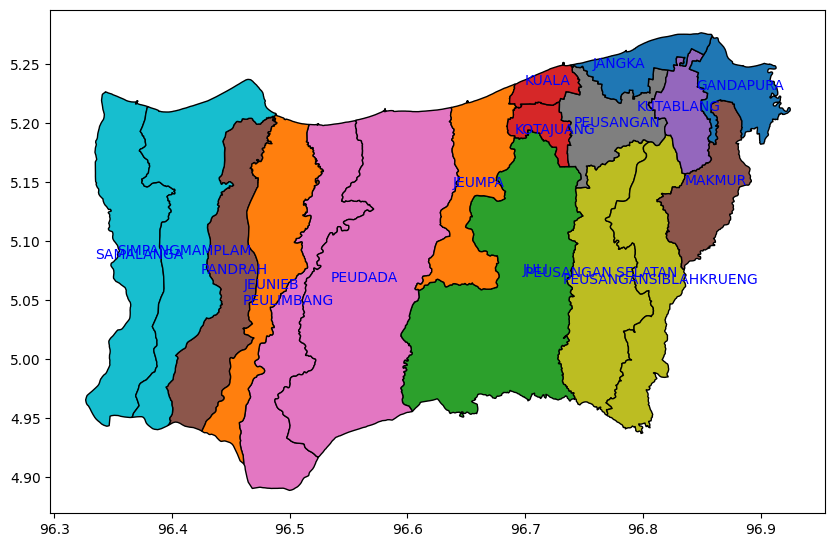

In [ ]:
kota["coords"] = kota["geometry"].apply(lambda x: x.representative_point().coords[:])
kota["coords"] = [coords[0] for coords in kota["coords"]]
fig, ax = plt.subplots(figsize = (10,10))
kota.plot(ax=ax, column="NAMOBJ", categorical=True,edgecolor="black", )
for idx, row in kota.iterrows():
 plt.annotate(text=row["NAMOBJ"], xy= row["coords"], horizontalalignment="center", color="blue")